The goal of this jupyter notebook is to query and organise information about the genetic underpinnings of coronary artery disease (CAD).

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.lines import Line2D
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
def retrieve_gda(disease):
    auth_params = {"email":"********","password":"********"}#enter DisGeNet username abd passeword
    api_host='https://www.disgenet.org/api'
    req=requests.Session()
    url = api_host+'/auth/'
    response = req.post(url, data=auth_params)
    token=response.json()['token']
    req.headers.update({"Authorization": "Bearer %s" % token}) 
    return req.get(api_host+'/gda/disease/{}'.format(disease)).json()
    
def retrieve_vda(disease):
    auth_params = {"email":"yunntienlee@gmail.com","password":"TheoDisgenet01"}
    api_host='https://www.disgenet.org/api'
    req=requests.Session()
    url = api_host+'/auth/'
    response = req.post(url, data=auth_params)
    token=response.json()['token']
    req.headers.update({"Authorization": "Bearer %s" % token}) 
    return req.get(api_host+'/vda/disease/{}'.format(disease)).json()

#here I created a function to retrieve the evidences of the GDAs
def evidence(d):
    auth_params = {"email":"yunntienlee@gmail.com","password":"TheoDisgenet01"}
    api_host='https://www.disgenet.org/api'
    req=requests.Session()
    url = api_host+'/auth/'
    response = req.post(url, data=auth_params)
    token=response.json()['token']
    req.headers.update({"Authorization": "Bearer %s" % token}) 
    return req.get(api_host+'/gda/evidences/disease/{}?limit=20000&offset=400'.format(d)).json()

The functions above allow the user to query the DisGeNET API. 
The first one queries the information about the genes associated with the interested disease, the second queries the variants.

In [3]:
cad=retrieve_gda('C1956346')
vcad=retrieve_vda('C1956346')
evi=evidence('C1956346')
cad20=cad[:20]
vcad20=vcad[:20]
spdis50=cad[:50]

Table 1 shows the top 20 genes associated to CAD, ordered by discovery year
ADD number of publications to table 1. For this , you should query the evidences api endpoint

In [4]:
#this cell creates a list containing all the gene's symbols, and counts the number of appearence

cadd={item['gene_symbol']:item for item in cad20}

gene20=[]
for gene in cadd:
    gene20.append(gene)
gene20

gg=['']
ev=evi['results']

gd={}
for item in ev:
    gd[item['pmid']]=item['gene_symbol']

evic={}

for element in gene20:
    np={}
    evic[element]=np
    np['N.Pmid']=sum(value == element for value in gd.values())

for gene in cadd:
        for Gene in evic:
            if gene==Gene:
                cadd[gene].update(evic[Gene])


In [5]:
cadtable=pd.DataFrame.from_dict({(i):cadd[i] for i in cadd.keys()},orient='index')
                                   
cadinfo=cadtable[['gene_symbol','geneid','ei','score','year_initial', 'year_final','N.Pmid']].sort_values(by=['year_initial'])

cadplot=cadinfo.set_index([pd.Index(range(1,21))])

cadplot2=cadplot.reset_index()
cadplot2


,index,gene_symbol,geneid,ei,score,year_initial,year_final,N.Pmid
0,1,LDLR,3949,0.989,0.50,1986,2020,68
1,2,LPA,4018,0.958,0.50,1988,2019,129
2,3,NOS3,4846,0.918,0.50,1996,2020,99
3,4,ABCG8,64241,1.000,0.45,2000,2018,3
4,5,APOA5,116519,0.938,0.50,2001,2019,34
5,6,PECAM1,5175,1.000,0.49,2003,2018,6
6,7,LIPA,3988,1.000,0.45,2003,2019,5
7,8,TERT,7015,1.000,0.52,2005,2019,5
8,9,PCSK9,255738,0.987,0.50,2006,2020,61
9,10,CDKN2B,1030,1.000,0.50,2008,2019,10


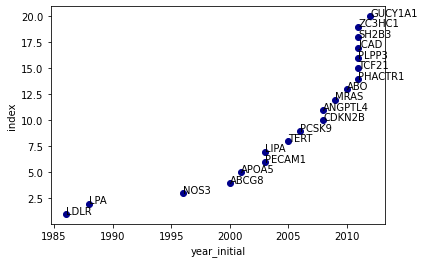

In [6]:
fig, ax = plt.subplots()
ax.scatter(x=cadplot2['year_initial'],y=cadplot2['index'],c='DarkBlue')
ax.set_xlabel('year_initial')
ax.set_ylabel('index')
for idx, row in cadplot2.iterrows():
    ax.annotate(row['gene_symbol'], (row['year_initial'], row['index']) )
plt.show()

Figure 1: Top genes associated to CAD, chronologically ordered. 

Table 2 displays the first 20 gene variants associated to the CAD, in chronological order.

In [7]:
vcadtable=pd.DataFrame(vcad20)
vcadinfo=vcadtable[['variantid','gene_symbol','variant_consequence_type','ei','score','year_initial', 'year_final']].sort_values(by=['year_initial'])
vcadplot=vcadinfo.set_index([pd.Index(range(1,21))])
vcadplot2=vcadplot.reset_index()
vcadplot2
# need to add the number of publications to the variants

,index,variantid,gene_symbol,variant_consequence_type,ei,score,year_initial,year_final
0,1,rs1333049,CDKN2B-AS1,intron variant,0.944444,0.90,2007,2019
1,2,rs4977574,CDKN2B-AS1,intron variant,1.000000,0.89,2007,2019
2,3,rs2891168,CDKN2B-AS1,intron variant,1.000000,0.82,2007,2018
3,4,rs1333042,CDKN2B-AS1,intron variant,1.000000,0.81,2007,2018
4,5,rs1746049,None,downstream gene variant,1.000000,0.80,2007,2016
5,6,rs974819,None,intron variant,1.000000,0.82,2012,2018
6,7,rs246600,ARHGAP26,intron variant,1.000000,0.80,2013,2018
7,8,rs2252641,TEX41;LOC100505498,non coding transcript exon variant,1.000000,0.80,2013,2018
8,9,rs16986953,None,intergenic variant,1.000000,0.80,2013,2018
9,10,rs12936587,None,regulatory region variant,1.000000,0.80,2013,2018


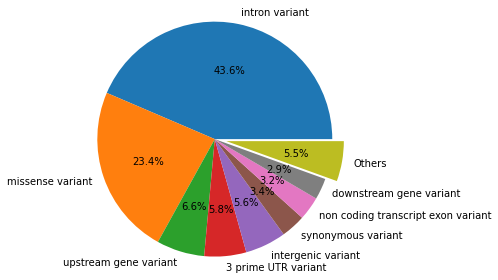

In [8]:
vcadall=pd.DataFrame(vcad)
vcadall2=vcadall['variant_consequence_type'].value_counts(normalize=True)
vcadalldic=vcadall2.to_dict()
newdic={}
for key, group in itertools.groupby(vcadalldic, lambda k: 'Others' if (vcadalldic[k]<0.02) else k):
     newdic[key] = sum([vcadalldic[k] for k in list(group)])   
labels = newdic.keys()
sizes = newdic.values()
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,0,0,0,0,0,0,.1), startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

Figure 2 : Partition of the consequences of the variants associated to the CAD.

In [9]:
vcadm=pd.DataFrame(vcad)
vcadm=vcadm.loc[(vcadm['variant_consequence_type']=='missense variant')]
vcadm=vcadm.iloc[0:20,:]
vcadm=vcadm.set_index([pd.Index(range(1,21))])
vcadm=vcadm[['variantid','gene_symbol','score','variant_consequence_type']]
vcadm

,variantid,gene_symbol,score,variant_consequence_type
1,rs11556924,ZC3HC1,0.84,missense variant
2,rs3184504,ATXN2;SH2B3,0.81,missense variant
3,rs867186,PROCR;MMP24-AS1-EDEM2,0.81,missense variant
4,rs699,AGT,0.80,missense variant
5,rs11591147,PCSK9,0.73,missense variant
6,rs1169288,HNF1A;HNF1A-AS1,0.73,missense variant
7,rs7412,APOE,0.73,missense variant
8,rs2075291,ZPR1;APOA5,0.72,missense variant
9,rs116843064,ANGPTL4,0.71,missense variant
10,rs1800449,LOX,0.71,missense variant


Table 2 shows the top genes associated to the missense variants 
(here add a table with the genes, and the number of missense variants)

In [10]:
geneinfo = {item['gene_symbol']:item for item in spdis50}
geneinfot = {}
wanted=['geneid','ei','score','year_initial']
for k, v in geneinfo.items():
    v2 = { k2:v[k2] for k2 in wanted if k2 in v }
    if v2:
        geneinfot[k] = v2
ans=[]
for gene in geneinfot:
    api_host='https://www.proteinatlas.org/api'
    req=requests.Session()
    answer = req.get(api_host+'/search_download.php?search={}&format=json&columns=g,gs,evih,pe,rnats,rnatd,rnatsm&compress=no'.format(gene)).json()
    
    for dictionary in answer:
        if dictionary['Gene']==gene:
            ans.append(dictionary)
ans2={item['Gene']:item for item in ans}
disgene={}
wanted=['Gene synonym','Evidence','HPA evidence','RNA tissue specificity','RNA tissue distribution','RNA tissue specific nTPM']
for k, v in ans2.items():
    v2 = { k2:v[k2] for k2 in wanted if k2 in v }
    if v2:
        disgene[k] = v2
for gene in geneinfot:
    for Gene in disgene:
        if gene==Gene:
            geneinfot[gene].update(disgene[Gene])

genetable=pd.DataFrame.from_dict({(i):geneinfot[i] for i in geneinfot.keys()},orient='index')
genet2=genetable.sort_values(by='year_initial')

In [11]:
g=genet2[['RNA tissue specific nTPM']].to_dict('dict')
gg=g['RNA tissue specific nTPM']

In [13]:
import numpy as np
ggt=pd.DataFrame(gg)
ggt=ggt.replace(np.nan,0)
#ggt=pd.DataFrame({'adrenal gland':np.linspace(1,10,10)})
#ggt=ggt.T
ggt=ggt.astype(float)
#ggt=ggt.style.background_gradient(cmap='Greens')
pd.options.display.float_format='{:,.0f}'.format
ggt=ggt.astype(int)

<AxesSubplot:>

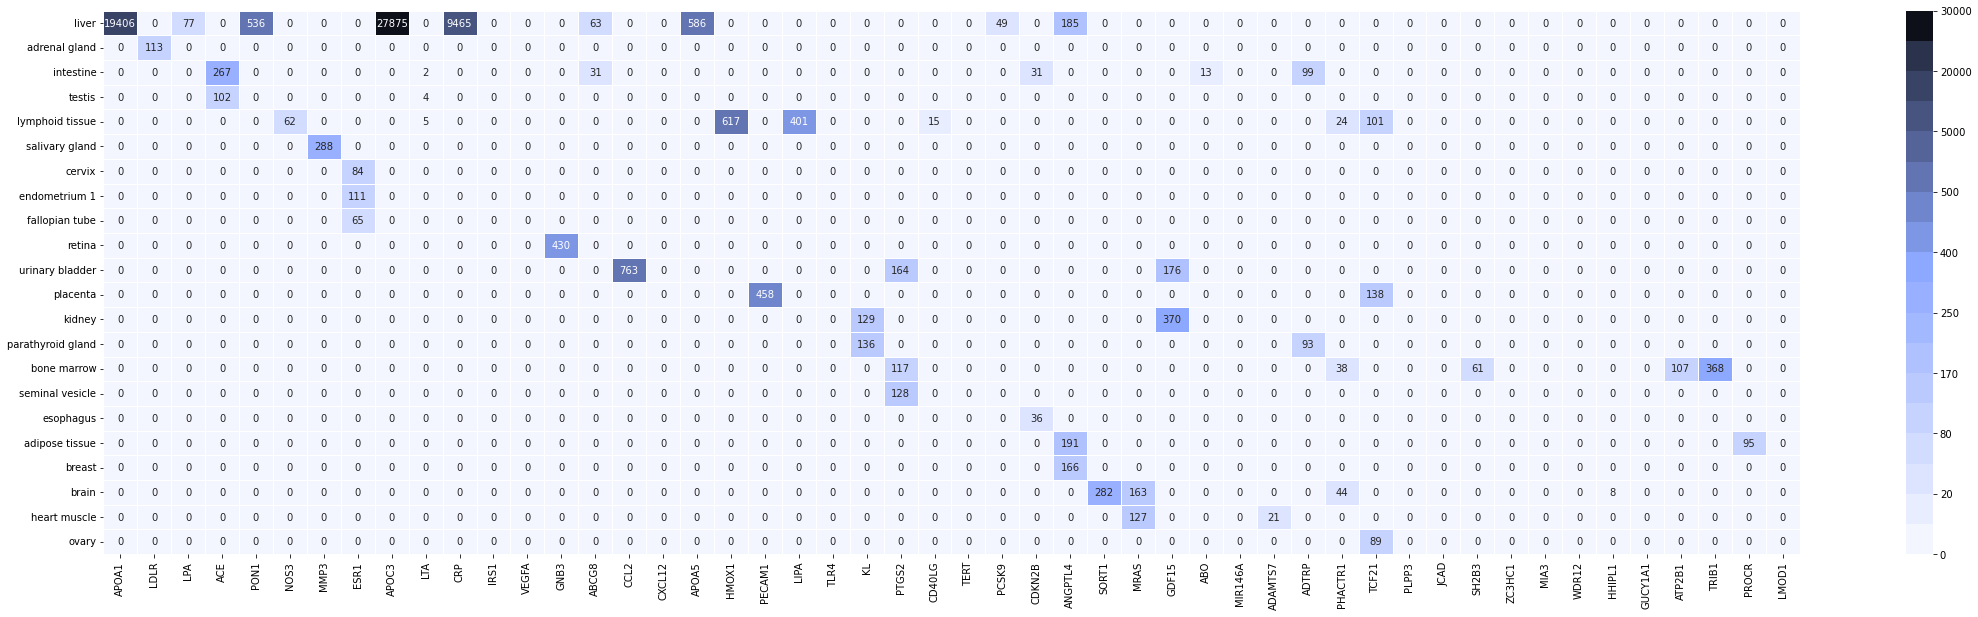

In [14]:
my_colors=['#f3f6ff','#e8edff','#dce4ff','#d1dcff','#c6d3ff','#bacaff','#afc2ff','#a3b9ff','#98b0ff','#8da8ff','#7e97e5','#7086cc','#6275b2','#546499','#46547f','#384366','#2a324c','#1c2133','#0e1019']
my_cmap = ListedColormap(my_colors)
bounds = [0,10,20,50,80,120,170,200,250,350,400,450,500,1000,5000,10000,20000,25000,30000]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

plt.figure(figsize=(38,10))
sns.heatmap(ggt, cmap=my_cmap, norm=my_norm, annot=True, fmt="d", linewidths=0.75)

Figure 3: Heatmap of the tissue expression of the top 50 genes associated with the CAD